<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Vaccine/blob/main/Sentiment_Analysis_of_Covid_19_Vaccine_Twwets_using_TextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis Through Textblob**

In [ ]:
#we can install TextBlob 
!pip install textblob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for cleaning the tweets
!pip install Texthero

     |████████████████████████████████| 1.5 MB 9.4 MB/s 
     |████████████████████████████████| 241 kB 40.6 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
#importing TextBlob
import textblob
from textblob import TextBlob

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
#Texthero for data cleaning
import texthero as hero
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#Loading the Tweets Dataset
data= pd.read_csv('vaccine_tweets.csv')

In [9]:
data.head(2)

,S.No,created_at,user.id,user.name,user.location,user.followers_count,user.friends_count,text,hashtags,retweet_count,lang,retweeted_status.text,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1,Mon 7 June-2021,1.016530e+09,vanna crawford,NaN,74,124,RT @mmpadellan: Pfizer literally has MILLIONS ...,['PfizerBioNTech'],1414,en,Pfizer literally has MILLIONS of doses of vacc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mon 7 June-2021,1.549651e+09,James,"Shaker Heights, OH",11020,12084,RT @rmayemsinger: Rupert Murdoch's Fox News ca...,NaN,49,en,Rupert Murdoch's Fox News called Covid a hoax ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#we need only Tweet Text
df= data[['text']]
df.head(5)

,text
0,RT @mmpadellan: Pfizer literally has MILLIONS ...
1,RT @rmayemsinger: Rupert Murdoch's Fox News ca...
2,RT @telushk: I'ma get the vaccine. And if I tu...
3,RT @StevenBeschloss: The argument was Pence sh...
4,RT @MollyJongFast: Rupert Murdoch got the Covi...


In [11]:
df['CleanData']=hero.clean(df['text'])

df.head(10)

,text,CleanData
0,RT @mmpadellan: Pfizer literally has MILLIONS ...,rt mmpadellan pfizer literally millions doses ...
1,RT @rmayemsinger: Rupert Murdoch's Fox News ca...,rt rmayemsinger rupert murdoch fox news called...
2,RT @telushk: I'ma get the vaccine. And if I tu...,rt telushk get vaccine turn horse oh well
3,RT @StevenBeschloss: The argument was Pence sh...,rt stevenbeschloss argument pence get vaccine ...
4,RT @MollyJongFast: Rupert Murdoch got the Covi...,rt mollyjongfast rupert murdoch got covid vacc...
5,@mlipsitch @JCompson_III Since the vaccine has...,mlipsitch jcompson iii since vaccine lots glit...
6,RT @01Cole: Australia First Minister takes the...,rt 01cole australia first minister takes vacci...
7,Dr. Miami got the covid vaccine before me. ðŸ˜©,dr miami got covid vaccine dy~(c)
8,RT @MollyJongFast: Rupert Murdoch got the Covi...,rt mollyjongfast rupert murdoch got covid vacc...
9,RT @UFHealth: Will the COVID-19 vaccine be saf...,rt ufhealth covid vaccine safe effective fda r...


In [12]:
text1 =  "Vaccine is very effective"
blob1 = TextBlob(text1)
blob1.sentiment

Sentiment(polarity=0.78, subjectivity=1.0)

In [ ]:
text2 =  "Vaccine is very bad lots of side effects"
blob2 = TextBlob(text2)
blob2.sentiment

as we can see that in above two examples 
first sentence polarity score is greater than zero that means it's a positive sentence
second sentence polarity score is negative hence negative sentence 

In [13]:
text3 =  "is Covaxin has approval  WHO"
blob3 = TextBlob(text3)
blob3.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [14]:
tweet =  "Today active cases surpassed 100 lacs.5 days ago active cases were 4 lacs. The recovery rate is also lowest since April. No beds available in Hospitals again. excellent job has done by Doctors! Maintain Social Distancing, Wear Mask"
blob = TextBlob(tweet)
blob.sentiment

Sentiment(polarity=0.23333333333333334, subjectivity=0.5333333333333334)

In [15]:
clean_tweets= pd.read_csv('Vaccine Tweets1.csv')

In [ ]:
clean_tweets.head(5)

In [19]:
polarity_score = [] #Creating Empty List

In [20]:
for i in range(0,clean_tweets.shape[0] ): #first record to lst record
    score = TextBlob(clean_tweets.iloc[i][1]) #selecting second column TextBlob Data
    score1 = score.sentiment[0] #getting the sentiment score
    polarity_score.append(score1) #adding each tweets polarity score into list

In [21]:
clean_tweets = pd.concat([clean_tweets, pd.Series(polarity_score)]  , axis =1 )
#dding polarity score into original dataframe
clean_tweets.head(5)

,Unnamed: 0,TextBlob,0
0,0,mmpadellan pfizer literally millions doses v...,0.50
1,1,rmayemsinger rupe murdoch fox news called c...,0.00
2,2,telushk get vaccine turn horse oh well,0.00
3,3,stevenbeschloss argument pence get vaccine e...,-0.05
4,4,mollyjongfast rupe murdoch got covid vaccin...,-0.05


In [22]:
#Renaming added column
clean_tweets.rename(columns={clean_tweets.columns[2]  :"Sentiment"}, inplace = True ) 

In [23]:
#getting number of Positive Sentiments
len(clean_tweets[clean_tweets.Sentiment > 0])

944

In [24]:
#getting number of Negative Sentiments
len(clean_tweets[clean_tweets.Sentiment <0])

68

In [25]:
#Total No. of Tweets
clean_tweets.shape

(1432, 3)

In [26]:
#getting the Neutral Sentiments
len(clean_tweets[clean_tweets.Sentiment ==0])

420

In [28]:
#creating wordcloud 
from wordcloud import WordCloud  
WordCloud
from  nltk.corpus import stopwords #for stopwords 

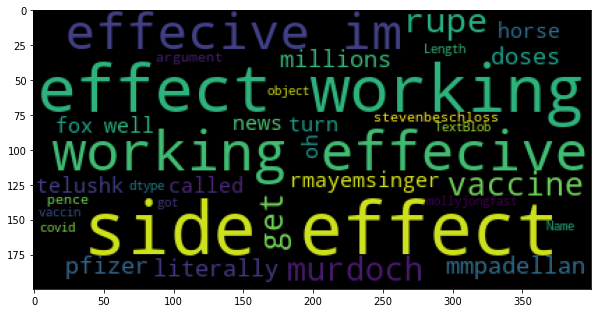

In [29]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(clean_tweets['TextBlob']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [30]:
positive_tweet=  clean_tweets[clean_tweets.Sentiment >0]
positive_tweet.shape

(944, 3)

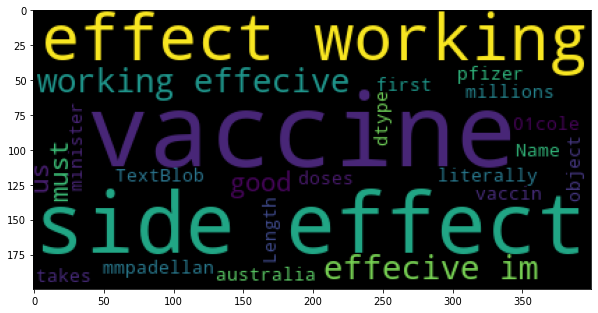

In [31]:
cloud  = WordCloud(max_words= 80, stopwords=stopwords.words("english") ).generate(str(positive_tweet['TextBlob']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [32]:
negative_tweet=  clean_tweets[clean_tweets.Sentiment <0]
negative_tweet.shape

(68, 3)

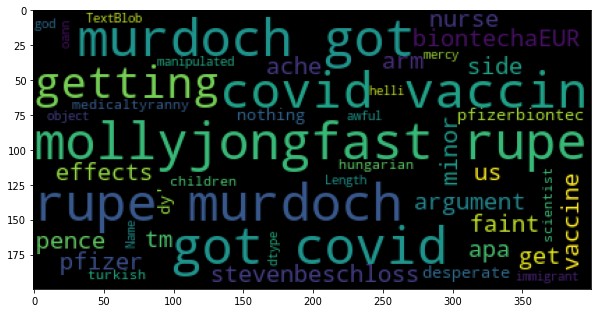

In [33]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(negative_tweet['TextBlob']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)